In [1]:
import pandas as pd
from nltk.util import trigrams
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import sys


In [2]:
# Membaca file Excel
file_path = 'bersih.xlsx'
df= pd.read_excel(file_path)

MEMBUAT TRIGRAM

In [3]:
#MEMBUAT TRIGRAM
# Mengisi NaN dengan string kosong dan memastikan kolom berupa string
df['Stemming'] = df['Stemming'].fillna(' ').astype(str)

# Membuat trigram dengan gensim
tokenized_texts = [text.split() for text in df['Stemming']]  # Tokenisasi teks
phrases = Phrases(tokenized_texts, min_count=1, threshold=1)  # Membuat model Phrases
trigram_mod = Phraser(phrases)  # Membuat model Phraser

# Menggabungkan trigram menjadi teks
df['trigram'] = [list(trigrams(text)) for text in tokenized_texts]  # Menghasilkan trigram (tuple)
df['trigram_text'] = [' '.join(trigram_mod[text]) for text in tokenized_texts]  # Menghasilkan teks trigram



In [4]:
#MENYIMPAN TRIGRAM
output_file_path = "trigramfix.xlsx"
df.to_excel(output_file_path, index=False)
print("Output saved to:", output_file_path)

Output saved to: trigramfix.xlsx


MEMBUAT TF-IDF

In [5]:
# Menghitung TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['trigram_text'])

In [6]:
# Menampilkan nilai TF-IDF dalam bentuk DataFrame
tfidf_feature_names = vectorizer.get_feature_names_out()  # Nama fitur (trigram)
tfidf_values = tfidf_matrix.toarray()  # Mengubah TF-IDF matrix ke array

# Membuat DataFrame untuk visualisasi nilai TF-IDF
tfidf_df = pd.DataFrame(tfidf_values, columns=tfidf_feature_names)


In [7]:
tfidf_df

,abad,abaik,abal,abcdefu,abis,abis_baru,abu,academy,acak,acara,...,yey,ygrecomended,ygvtahu,yong,yozjjaz,yt,ytb,yukbersamanabung,yunitarchcom,zcashback
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#MENYIMPAN KE CSV
import os

# Path direktori dan file
output_dir = "C:/Users/andin/OneDrive/Documents/skripsi/draft/gabungan sintaks"
output_file_path = os.path.join(output_dir, "pembobotanfidf.csv")

# Membuat direktori jika belum ada
os.makedirs(output_dir, exist_ok=True)

# Menyimpan DataFrame ke CSV
tfidf_df.to_csv(output_file_path, index=False)
print("Output saved to:", output_file_path)

Output saved to: C:/Users/andin/OneDrive/Documents/skripsi/draft/gabungan sintaks\pembobotanfidf.csv


KLASIFIKASI

In [9]:
# INISIASI VARIABEL X DAN Y
X = tfidf_matrix
y = df['label']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
#nilai k KNN
# Menggunakan parameter grid untuk range 1-10
param_grid = {'n_neighbors': range(1, 11)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menyusun hasil semua nilai K dan akurasinya
results = pd.DataFrame(grid_search.cv_results_)[['param_n_neighbors', 'mean_test_score']]
results.columns = ['K', 'Accuracy']


results

,K,Accuracy
0,1,0.666178
1,2,0.617416
2,3,0.671110
3,4,0.665453
4,5,0.661250
5,6,0.701795
6,7,0.693033
7,8,0.758218
8,9,0.748545
9,10,0.765344


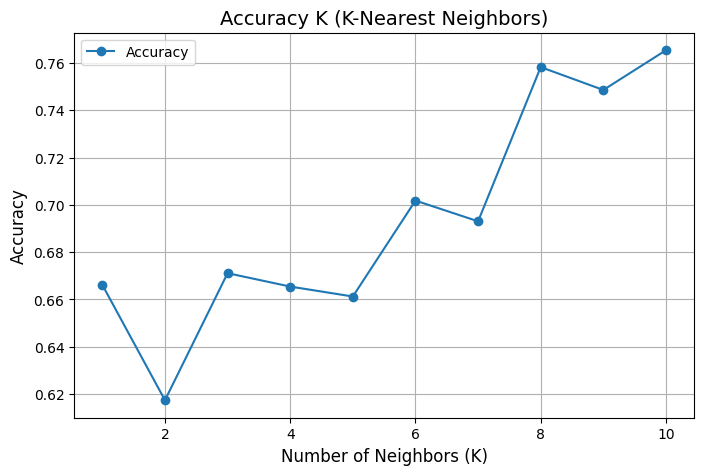

In [ ]:
#VISUAL KNN
# 'K' dan 'Accuracy' berupa nilai numerik
results['K'] = results['K'].astype(int)  # Konversi K menjadi integer 
results['Accuracy'] = results['Accuracy'].astype(float)  # Konversi Accuracy menjadi float

# Plot hasil K dan akurasi
plt.figure(figsize=(8, 5))
plt.plot(results['K'], results['Accuracy'], marker='o', label='Accuracy')

# Menambahkan judul dan label
plt.title('Accuracy K (K-Nearest Neighbors)', fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Menambahkan grid dan legenda
plt.grid(True)
plt.legend(fontsize=10)

# Menampilkan plot
plt.show()


In [12]:
# model KNN
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

#model naive bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# model C4.5
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=123)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

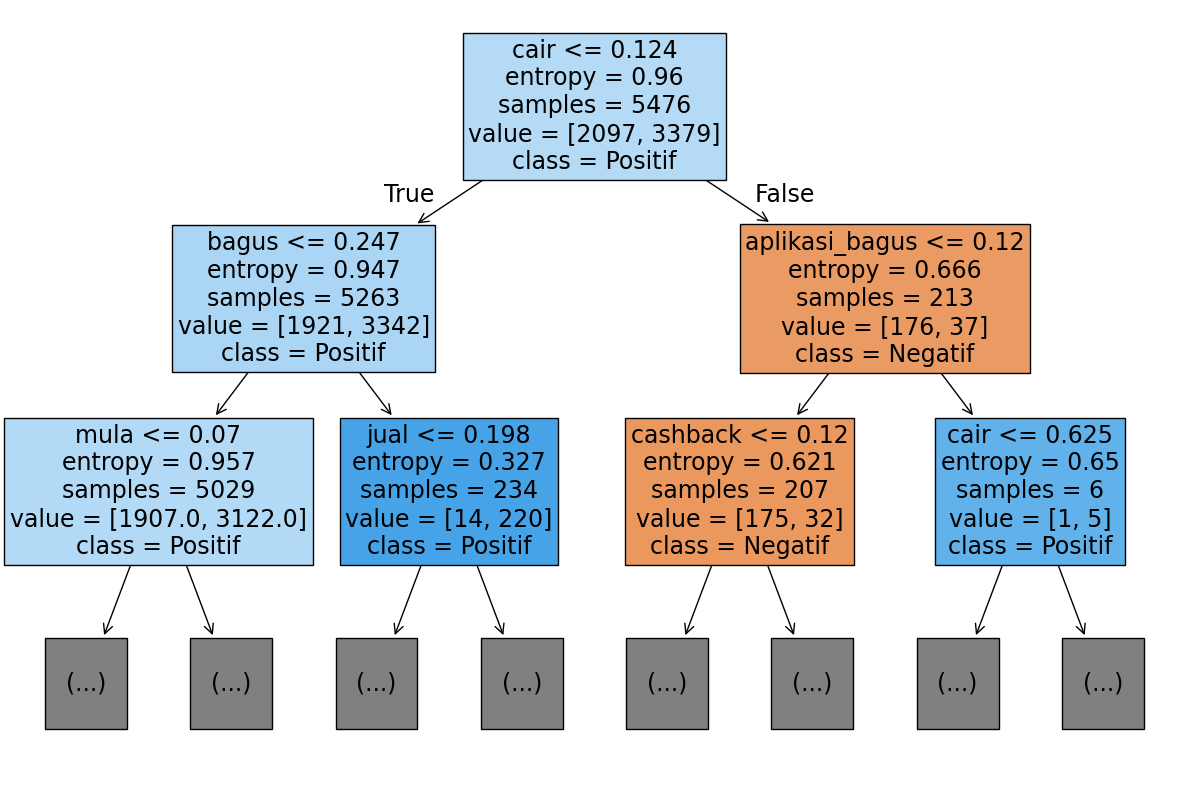

In [13]:
# Plot pohon keputusan dengan kedalaman maksimal 2
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=vectorizer.get_feature_names_out(), 
          class_names=['Negatif', 'Positif'], max_depth=2, filled=True, fontsize=17)
plt.show()


In [14]:
# Melihat kedalaman maksimum pohon setelah pelatihan
print("Kedalaman maksimum pohon:", dt_model.tree_.max_depth)


Kedalaman maksimum pohon: 1097


Pohon keputusan yang sangat dalam membuat proses visualisasi memanggil fungsi rekursif berkali-kali.
Dengan menambah batas rekursi menggunakan sys.setrecursionlimit(5000), Python diizinkan melakukan lebih banyak panggilan rekursif sehingga pohon yang sangat dalam dapat divisualisasikan tanpa error.

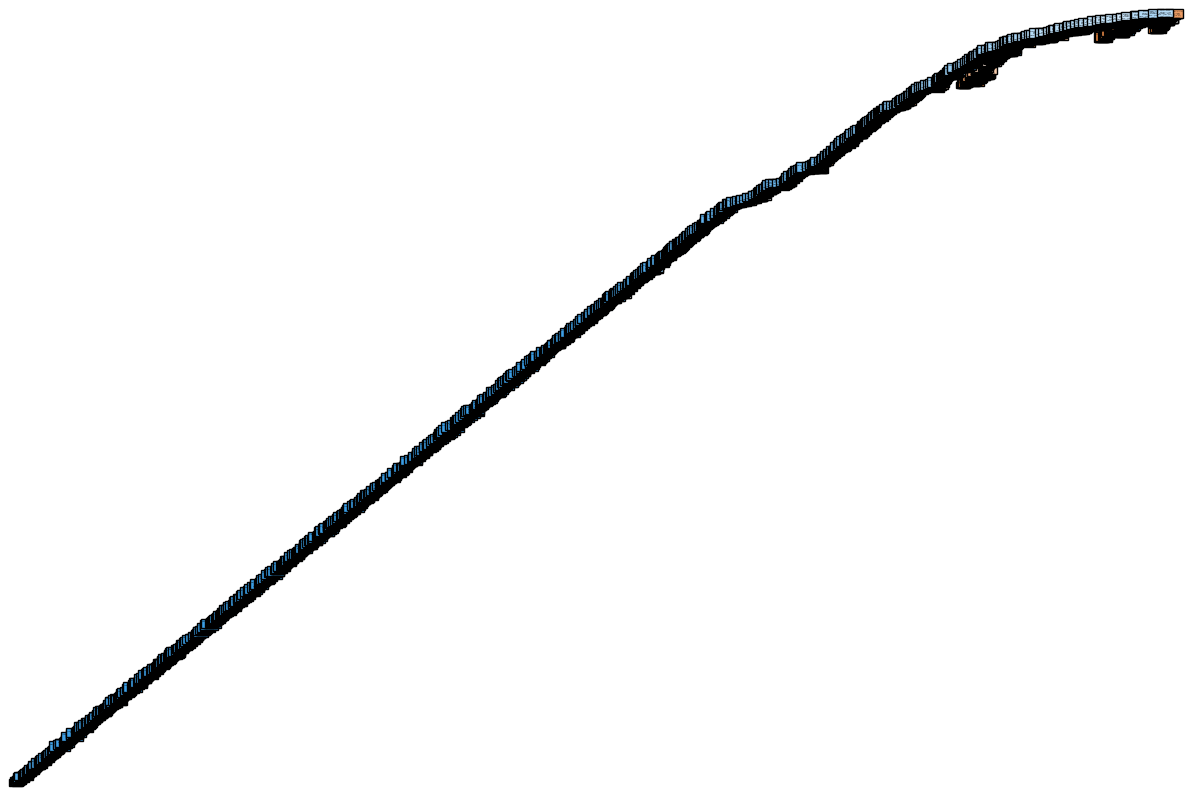

In [15]:

#KESELURUHAN POHON
sys.setrecursionlimit(5000)  # Tingkatkan batas rekursi

# VISUAL seluruh pohon
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=vectorizer.get_feature_names_out(), 
          class_names=['Negatif', 'Positif'],max_depth=1097, filled=True)
plt.show()


ENSEMBLE VOTING

In [16]:
# Membuat Voting Classifier (Ensemble)
ensemble_model = VotingClassifier(
    estimators=[
        ('Naive Bayes', nb_model),
        ('KNN', knn_model),
        ('Decision Tree (C4.5)', dt_model)
    ],
    voting='hard'  # Menggunakan voting mayoritas
)

# Melatih model
ensemble_model.fit(X_train, y_train)

# Evaluasi model
y_pred = ensemble_model.predict(X_test)


MENAMPILKAN HASIL KLASIFIKASI DARI ENSEMBLE

In [17]:
# Prediksi menggunakan Naive Bayes
nb_pred = nb_model.predict(X_test)

# Prediksi menggunakan KNN
knn_pred = knn_model.predict(X_test)

# Prediksi menggunakan Decision Tree (C4.5)
dt_pred = dt_model.predict(X_test)

# Prediksi menggunakan Ensemble
ensemble_pred = ensemble_model.predict(X_test)

# Menyimpan hasil prediksi ke DataFrame 
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Naive Bayes': nb_pred,
    'KNN': knn_pred,
    'Decision Tree c45': dt_pred,
    'Ensemble': ensemble_pred
})

# Menambahkan kolom untuk akurasi ensemble
predictions_df['Correct Ensemble'] = predictions_df['Ensemble'] == predictions_df['Actual']

# Menghitung akurasi ensemble dari DataFrame
ensemble_accuracy_df = predictions_df['Correct Ensemble'].mean()
print(f"Akurasi Ensemble Model dari predictions_df: {ensemble_accuracy_df:.2f}")

# Menambahkan indeks sebagai kolom dalam DataFrame
predictions_df_with_index = predictions_df.reset_index()
predictions_df_with_index

Akurasi Ensemble Model dari predictions_df: 0.82


,index,Actual,Naive Bayes,KNN,Decision Tree c45,Ensemble,Correct Ensemble
0,6671,0,0,0,0,0,True
1,3130,1,1,1,1,1,True
2,5696,0,0,0,0,0,True
3,3263,1,1,1,1,1,True
4,429,1,1,1,0,1,True
...,...,...,...,...,...,...,...
1365,1963,0,0,0,0,0,True
1366,15,0,0,0,0,0,True
1367,3865,1,1,1,0,1,True
1368,3768,1,1,1,1,1,True


In [18]:
#MENYIMPAN HASIL KLASIFIKASI
output_file_path = "hasilklasifikasi.xlsx"
predictions_df_with_index.to_excel(output_file_path, index=False)
print("Output saved to:", output_file_path)

Output saved to: hasilklasifikasi.xlsx


In [18]:
# Menampilkan hasil evaluasi ensemble VOTING
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Akurasi Model Ensemble dengan Trigram: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi Model Ensemble dengan Trigram: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       499
           1       0.84      0.90      0.87       871

    accuracy                           0.82      1370
   macro avg       0.82      0.80      0.80      1370
weighted avg       0.82      0.82      0.82      1370

Confusion Matrix:
[[344 155]
 [ 85 786]]


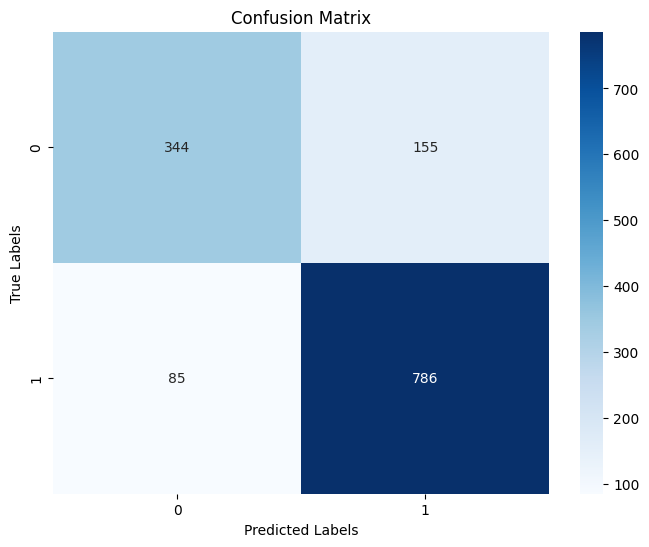

In [20]:
import seaborn as sns
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**LATENT DIRICHLET ALLOCATION**

In [21]:
from gensim.models import Phrases
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from gensim import corpora, models
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from wordcloud import WordCloud

In [22]:
#mengisi data kosong
df['trigram_text'].isnull().sum()
df['trigram_text'] = df['trigram_text'].fillna(' ')
# Filter hanya data dengan label negatif (label 0)
negatif_data = df[df['label'] == 0]['trigram_text'].tolist()

# Mengubah TF-IDF menjadi Corpus Gensim
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(negatif_data)
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(count_matrix)
feature_names = vectorizer.get_feature_names_out()
dictionary = corpora.Dictionary([feature_names])
corpus = [dictionary.doc2bow(doc.split()) for doc in negatif_data]

# Pemodelan Topik LDA dan Menghitung Koherensi
def compute_coherence(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    for num_topics in range(start, limit, step):
        lda_model = models.LdaModel(corpus=corpus,
                                    id2word=dictionary,
                                    num_topics=num_topics,
                                    random_state=123,
                                    passes=10,
                                    alpha='auto')
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return coherence_values

# Menghitung koherensi untuk 2 hingga 5 topik
start, limit, step = 2, 6, 1
texts = [text.split() for text in negatif_data]
coherence_values = compute_coherence(dictionary, corpus, texts, start, limit, step)

# Menentukan jumlah topik optimal
x = range(start, limit, step)
optimal_topics = x[coherence_values.index(max(coherence_values))]
print(f"Jumlah topik optimal: {optimal_topics}")


Jumlah topik optimal: 2


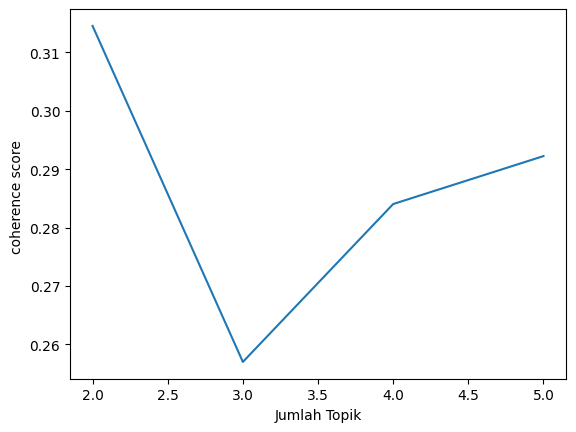

[0.31452577077400934,
 0.25698963554374427,
 0.2840263185765431,
 0.29223495665232885]

In [23]:
# Mengulang visualisasi dan menampilkan data secara numerik
# Menampilkan Grafik Koherensi
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Jumlah Topik")
plt.ylabel("coherence score ")
plt.show()

# Tabel nilai koherensi
coherence_values


In [24]:
# Membuat model LDA dengan jumlah topik optimal
optimal_model = models.LdaModel(corpus=corpus,
                                id2word=dictionary,
                                num_topics=optimal_topics,
                                random_state=123,
                                    passes=10,
                                alpha='auto')

# Menampilkan topik-topik yang dihasilkan
print(f"Topik dengan jumlah optimal ({optimal_topics} topik):")
for idx, topic in optimal_model.print_topics(num_topics=optimal_topics, num_words=10):
    print(f"Topik {idx + 1}: {topic}")

Topik dengan jumlah optimal (2 topik):
Topik 1: 0.024*"cair" + 0.013*"jual" + 0.012*"uang" + 0.012*"investasi" + 0.011*"rekening" + 0.009*"cair_dana" + 0.007*"proses" + 0.007*"minggu" + 0.007*"dana" + 0.007*"nabung"
Topik 2: 0.047*"aplikasi" + 0.021*"masuk" + 0.010*"investasi" + 0.009*"baik" + 0.009*"buka_aplikasi" + 0.008*"dana" + 0.007*"buka" + 0.007*"aplikasi_buka" + 0.007*"bagus" + 0.007*"daftar"


In [25]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


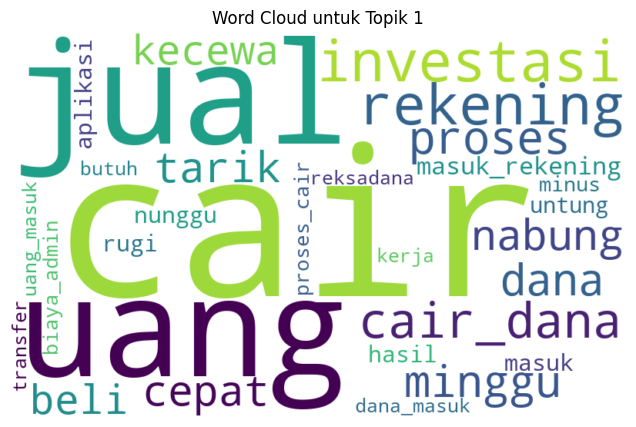

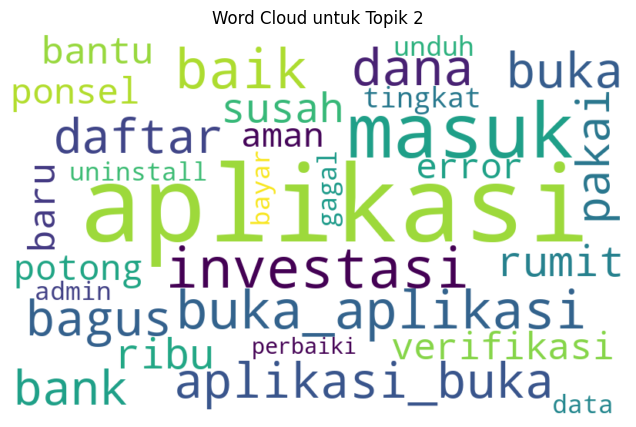

In [26]:
# model LDA dengan jumlah topik optimal
optimal_model = models.LdaModel(corpus=corpus,
                                id2word=dictionary,
                                num_topics=optimal_topics,
                                random_state=123,
                                    passes=10,
                                alpha='auto')

# Membuat Word Cloud untuk setiap topik
for idx in range(optimal_topics):
    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud untuk Topik {idx + 1}")

    # Mengambil kata-kata dan bobotnya untuk topik
    words = dict(optimal_model.show_topic(idx, topn=30))

    # Membuat word cloud
    wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=123).generate_from_frequencies(words)

    # Menampilkan word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
